# Ciencia de datos aplicada

## Taller 7

### Contexto

#### Linear Programming Model  

Every LP model is composed of 
* __Decision variables__ (whose values are unknown and are searched for)
* __Objective function__ (a linear mathematical function that relates the decision variables to the goal, measures goal attainment, and is to be optimized)
* __Objective function coefficients__ (unit profit or cost coefficients indicating the contribution to the objective of one unit of a decision variable)
* __Constraints__ (expressed in the form of linear inequalities or equalities that limit resources and/or requirements; these relate the variables through linear relationships), 
* __Capacities__(which describe the upper and sometimes lower limits on the constraints and variables), 
* __Input/Output__ (technology) coefficients (which indicate resource utilization for a decision variable).

Tomado de https://www.amazon.com/-/es/Ramesh-Sharda/dp/0134633288  Pg 339


In [1]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

### Extensión

Resuelva el siguiente ejercicio:

Let us assume that a Hospital has different departments and only four surgical departments performing different surgery. The performance of these surgeries is constrained by four resources: 
* (i). Waiting room (WR) hours 
* (ii).Operating Room (OR) hours 
* (iii). Recovery room (RR) bed hours and 
* (iv). Surgical services (SS). 

The capacity hours of WR, OR, RR and SS are 750 hours, 1000 hours, 1300 hours and 630 hours respectively for performing the different surgeries. 

Now, the director of the hospital is in a position to determine the optimal combination of surgical patients that maximizes the profit contributed by Patients with different surgeries (S_1,S_2,S_3,S_4)

The constraints are:

|    | $s_1$ | $s_2$ | $s_3$ | $s_4$ |
|:--:|:-----:|:-----:|:-----:|:-----:|
| WR | 5 | 7 | 9 | 4 |
| OR | 4 | 6 | 5 | 7 |
| RR | 3 | 5 | 4 | 6 |
| SS | 6 | 3 | 2 | 5 |

Let the average contribution to profit by $s_1, s_2, s_3, s_4$ patients are \\$20, \\$22, \\$21 and \\$19 respectively. Thus in order to determine the optimal combination of surgical patients that maximizes the total profit contributed by Patients with different surgeries. 


#### Preguntas

1. Establezca las variables del problema
2. Cree las ecuaciones
3. Represente el sistema matricial
4. Grafique al menos 2 de las cirugías
5. Cree el programa linprog y halle la solución





Tenemos las siguientes variables de decisión que representan la cantidad de cirugías a efectuar de cada tipo:

$s_{i}, \ \forall i \in \{ 1, 2, 3, 4 \}$

### Ecuaciones

Estas restricciones no permiten que se excedan los tiempos disponibles para cada tipo de recurso.

Restricción de recurso WR:

$$
    5 \cdot s_{1} + 7 \cdot s_{2} + 9 \cdot s_{3} + 4 \cdot s_{4} \leq 750.
$$

Restricción de recurso OR:

$$
    4 \cdot s_{1} + 6 \cdot s_{2} + 5 \cdot s_{3} + 7 \cdot s_{4} \leq 1000.
$$

Restricción de recurso RR:

$$
    3 \cdot s_{1} + 5 \cdot s_{2} + 4 \cdot s_{3} + 6 \cdot s_{4} \leq 1300.
$$

Restricción de recurso SS:

$$
    6 \cdot s_{1} + 3 \cdot s_{2} + 2 \cdot s_{3} + 5 \cdot s_{4} \leq 630.
$$

Naturaleza de las variables (se definen como positivas pero el problema bien definido debe considerar variables enteras):

$$
    s_{1}, s_{2}, s_{3}, s_{4} \geq 0
$$

o, preferiblemente:

$$
    s_{1}, s_{2}, s_{3}, s_{4} \in \mathbb{N}. 
$$

Función objetivo que maximiza las ganancias de las cirugías efectuadas:

$$
    \max_{s_{1}, s_{2}, s_{3}, s_{4}}{20 \cdot s_{1} + 22 \cdot s_{2} + 21 \cdot s_{3} + 19 \cdot s_{4}}
$$

### Sistema matricial

$$
    \max_{\mathbf{s}}{\mathbf{c}^{T}\mathbf{s}}\text{ ó }\max_{s_{1}, s_{2}, s_{3}, s_{4}}{\left[\begin{matrix}20 & 22 & 21 & 19\end{matrix}\right]\left[\begin{matrix} s_{1} \\ s_{2} \\ s_{3} \\ s_{4}\end{matrix}\right]}
$$

s.a,

$$
    \mathbf{A}\mathbf{s}\leq\mathbf{b}\text{ ó }
    \left[\begin{matrix}
        5 & 7 & 9 & 4 \\
        4 & 6 & 5 & 7 \\
        3 & 5 & 4 & 6 \\
        6 & 3 & 2 & 5 
    \end{matrix}\right]
    \left[\begin{matrix}
        s_{1} \\
        s_{2} \\
        s_{3} \\
        s_{4}
    \end{matrix}\right]\leq
    \left[\begin{matrix}
        750 \\
        1000 \\
        1300 \\
        630
    \end{matrix}\right]
$$

$$
    \mathbf{s} \geq \mathbf{0}\text{ ó }
    \left[\begin{matrix}
        s_{1} \\
        s_{2} \\
        s_{3} \\
        s_{4}
    \end{matrix}\right]\geq
    \left[\begin{matrix}
        0 \\
        0 \\
        0 \\
        0
    \end{matrix}\right]
$$

### Gráfica de 2 cirugías

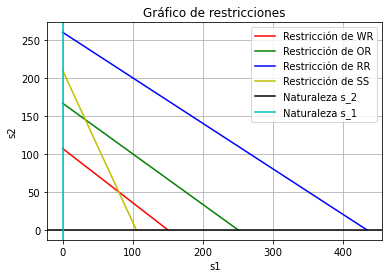

In [2]:
# Graficamos las restricciones solo para las primeras dos variables y suponiendo s_3 = s_4 = 0.
# s_1 en el eje x, s_2 en el eje y.
plt.plot((0, 750/5) ,  (750/7, 0),  '-r', label = "Restricción de WR")
plt.plot((0, 1000/4),  (1000/6, 0), '-g', label = "Restricción de OR")
plt.plot((0, 1300/3),  (1300/5, 0), '-b', label = "Restricción de RR")
plt.plot((0, 630/6),   (630/3, 0),  '-y', label = "Restricción de SS")

# Graficamos la naturaleza de las variables.
plt.axhline(y = 0, color = 'k', linestyle = '-', label='Naturaleza s_2')
plt.axvline(x = 0, color = 'c', linestyle = '-', label='Naturaleza s_1')

# Nombramos los ejes
plt.xlabel('s1')
plt.ylabel('s2')

# Nombramos el gráfico
plt.title('Gráfico de restricciones')

# Agregamos cuadrícula al gráfico
plt.grid()

# Agregamos una leyenda al gráfico
plt.legend(loc=1)

# Desplegamos el gráfico
plt.show()

### Optimización del problema

In [3]:
#la función linprog solamente minimiza por lo que hay que cambiar el signo de la función de costo
c = np.array([20, 22, 21, 19]) # Coeficientes de la funcion costo
A = np.matrix([[5, 7, 9, 4],
               [4, 6, 5, 7],
               [3, 5, 4, 6],
               [6, 3, 2, 5]]) # coeficientes de la matriz
b = np.array([750, 1000, 1300, 630]) # coeficientes libres
bounds=np.array([[0, None],[0, None], [0, None], [0, None]])# Límites de las variables s1, s2, s3 y s4

#Construimos la función
res = linprog(c=-c, # Función de costo. Minimizamos el negativo de la FO para maximizar.
              A_ub=A, #Matriz
              b_ub=b, #Coeficientes libres
              bounds=bounds, #límites de x              
              method="revised simplex") #método

print(res)

     con: array([], dtype=float64)
     fun: -2960.869565217391
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([  0.        ,  21.73913043, 469.13043478,   0.        ])
  status: 0
 success: True
       x: array([ 0.        , 53.47826087,  0.        , 93.91304348])


Vemos que en el óptimo, el problema solo considera en su base las variables $s_{2}$ y $s_{4}$.

Igual que antes, graficaremos únicamente dos variables pero esta vez las que sabemos son distintas de cero.

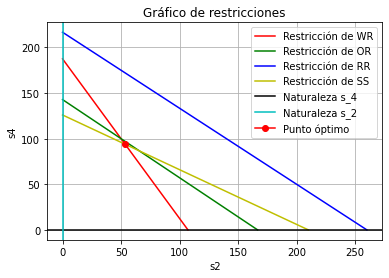

In [4]:
# Graficamos las restricciones solo para las primeras dos variables y suponiendo s_1 = s_3 = 0.
# s_2 en el eje x, s_4 en el eje y.
plt.plot((750/7, 0),  (0, 750/4), '-r', label = "Restricción de WR")
plt.plot((1000/6, 0), (0, 1000/7), '-g', label = "Restricción de OR")
plt.plot((1300/5, 0), (0, 1300/6), '-b', label = "Restricción de RR")
plt.plot((630/3, 0),  (0, 630/5),  '-y', label = "Restricción de SS")

# Graficamos la naturaleza de las variables.
plt.axhline(y = 0, color = 'k', linestyle = '-', label='Naturaleza s_4')
plt.axvline(x = 0, color = 'c', linestyle = '-', label='Naturaleza s_2')

# Graficamos el punto óptimo.
plt.plot(53.47826087, 93.91304348,  '-or', label = "Punto óptimo")

# Nombramos los ejes
plt.xlabel('s2')
plt.ylabel('s4')

# Nombramos el gráfico
plt.title('Gráfico de restricciones')

# Agregamos cuadrícula al gráfico
plt.grid()

# Agregamos una leyenda al gráfico
plt.legend(loc=1)

# Desplegamos el gráfico
plt.show()